# Polar Coordinate

## Polar Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

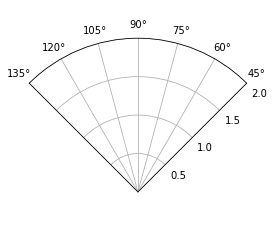

In [7]:
# 극 좌표계 선언
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
# ax = fig.add_subplot(111, polar=True)

ax.set_rmax(2) # 반지름 지정
# ax.set_rmin(1) # 중심점의 값 지정.
ax.set_rticks([0.5, 1, 1.5, 2]) # 표시 눈금 지정
ax.set_rlabel_position(90) # 눈금 표시 각도 지정

# 부채꼴
ax.set_thetamin(45)
ax.set_thetamax(135)

plt.show()

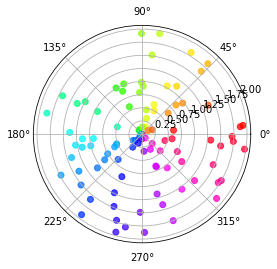

In [10]:
# scatter

N = 100
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
# area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, 
               c=colors, 
#                s=area, 
               cmap='hsv', alpha=0.75)
plt.show()

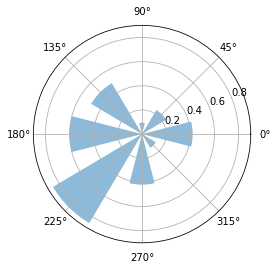

In [14]:
# bar

N = 8
r = np.random.rand(N)
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.bar(theta, r, width=0.5, alpha=0.5)
plt.show()

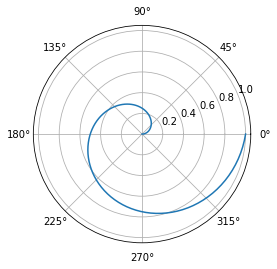

In [13]:
# plot

N = 100
r = np.linspace(0, 1, N)
theta = np.linspace(0, 2*np.pi, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, r)

plt.show()

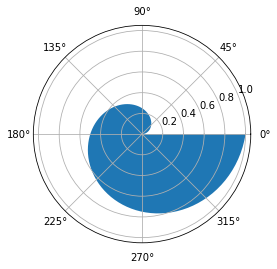

In [15]:
# fill

N = 100
r = np.linspace(0, 1, N)
theta = np.linspace(0, 2*np.pi, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.fill(theta, r)
plt.show()

## Radar Plot

In [16]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [17]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [23]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
values = pokemon.iloc[0][stats].to_list()
# print(values) # 값의 척도가 비슷

In [24]:
# 360도를 6등분
theta = np.linspace(0, 2*np.pi, 6, endpoint=False)
print(theta)

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776]


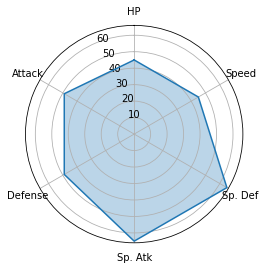

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

# 차트를 연결하기 위해 마지막에 처음과 같은 값을 넣어줌.
# values.append(values[0])
# theta = theta.tolist() + [theta[0]]

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.3)

ax.set_thetagrids([n*60 for n in range(6)], stats) # 각도별 label 변경
ax.set_theta_offset(np.pi/2) # 시작 점 변경 (각도)

plt.show()

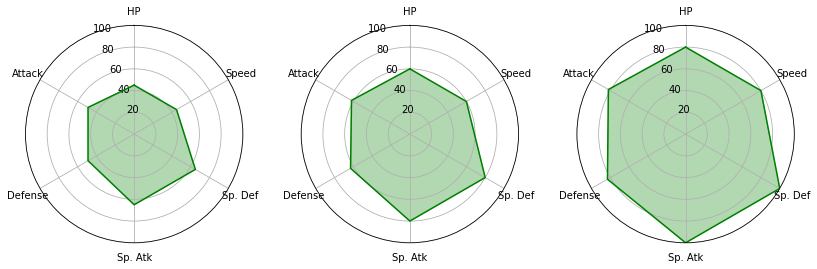

In [28]:
# 여러 데이터 비교 (나란히)
fig = plt.figure(figsize=(14, 4))

for i in range(3):
    # 각각 subplot을 제작
    ax = fig.add_subplot(1, 3, i+1, projection='polar')

    values = pokemon.iloc[i][stats].to_list()
    values.append(values[0])

    ax.plot(theta, values, color='green')
    ax.fill(theta, values, color='green', alpha=0.3)
    
    ax.set_rmax(100)
    ax.set_thetagrids([n*60 for n in range(6)], stats)
    ax.set_theta_offset(np.pi/2)
    
plt.show()

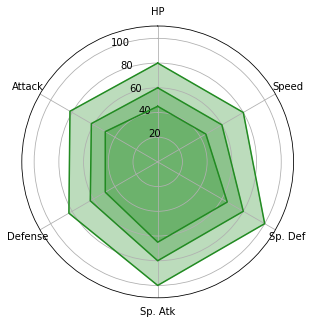

In [29]:
# 겹치게 그리기
fig = plt.figure(figsize=(5, 5))

# 하나의 subplot
ax = fig.add_subplot(111, projection='polar')

for i in range(3):
    values = pokemon.iloc[i][stats].to_list()
    values.append(values[0])

    ax.plot(theta, values, color='forestgreen')
    ax.fill(theta, values, color='forestgreen', alpha=0.3)
    
ax.set_rmax(110)
ax.set_thetagrids([n*60 for n in range(6)], stats)
ax.set_theta_offset(np.pi/2)
    
plt.show()

# Pie Charts

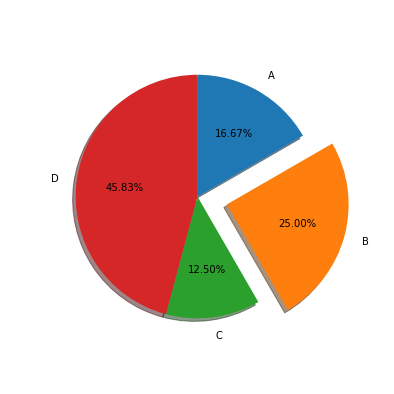

In [35]:
labels = ['A', 'B', 'C', 'D']
data = np.array([60, 90, 45, 165]) # 합이 360이어야함.

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(data,
       labels=labels, 
       startangle=90, # 시작 (첫 데이터) 각도
       explode=[0, 0.2, 0, 0], # 튀어나오는 정도
       shadow=True, # 그림자 효과
       autopct='%1.2f%%', # 비율 표시 포맷
       labeldistance=1.15, # 데이터 라벨과 차트의 거리 지정
#        rotatelabels=90, # 데이터 라벨의 각도 회전
       counterclock=False, # 데이터 순서의 방향 지정.
       radius=0.8
      )
plt.show()

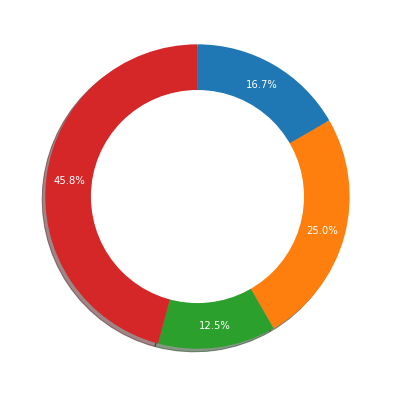

In [37]:
# donut chart custom
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


ax.pie(data, 
       labels=labels, 
       startangle=90,
       shadow=True, 
       autopct='%1.1f%%', 
       pctdistance=0.85, # 도넛 안에 값을 쓰기 위해 조정 
       textprops={'color':"w"}, # 텍스트 색
       counterclock=False
      ) 

# 가운데 흰 원
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax.add_artist(centre_circle)

plt.show()

# 다양한 시각화 라이브러리

In [39]:
import missingno as msno
import squarify
import pywaffle
import matplotlib_venn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Missingno

In [40]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:>

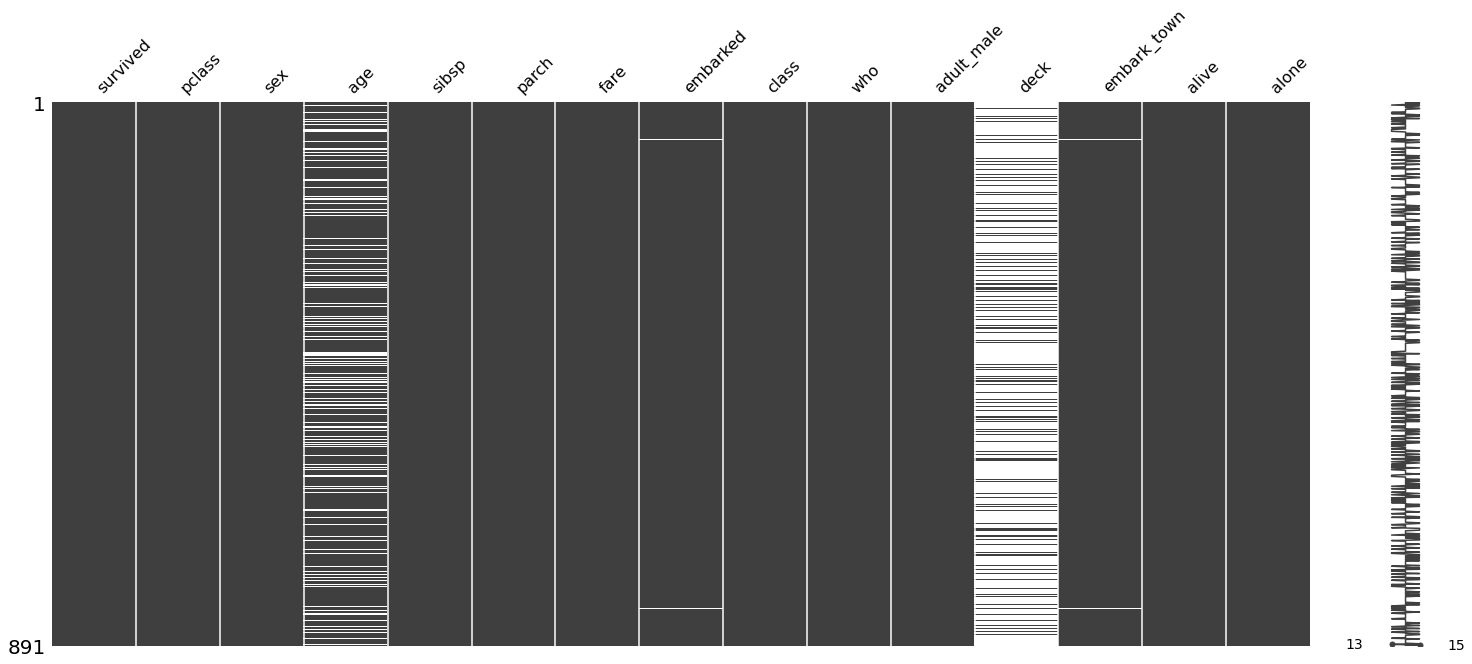

In [46]:
# 결측치를 흰 부분으로 표시
msno.matrix(titanic,
#             sort='ascending' # 결측치 수 대로 정렬
           ) 

<AxesSubplot:>

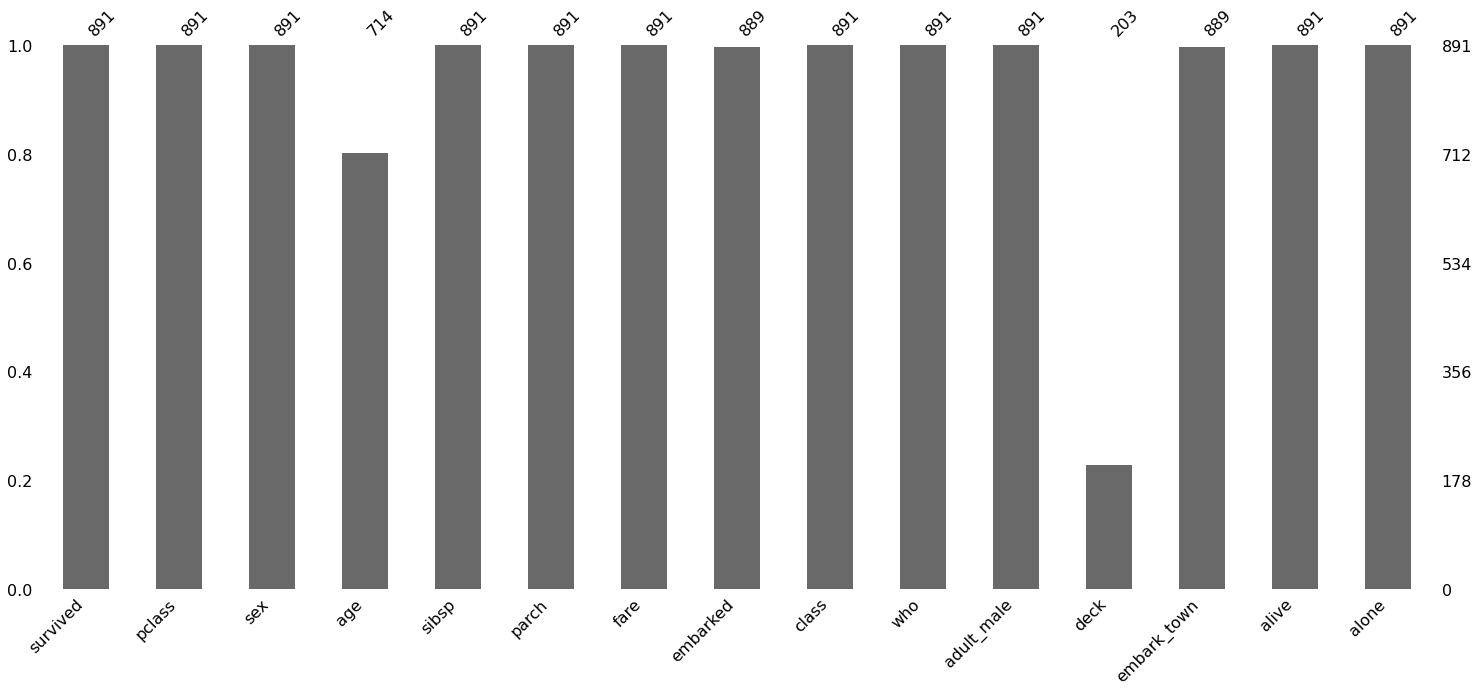

In [43]:
# 막대 그래프
msno.bar(titanic)

## Treemap

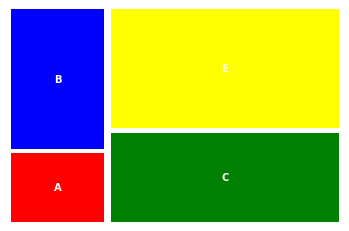

In [51]:
values = [100, 200, 300, 400]
fig, ax = plt.subplots()
squarify.plot(values, 
              label=list('ABCE'), 
              color=['red', 'blue', 'green', 'yellow'],
              pad=0.3,
              text_kwargs={'color':'white', 'weight':'bold'},
              ax=ax
             )

ax.axis('off') # 축을 지움.
plt.show()

## Waffle Chart

In [52]:
from pywaffle import Waffle

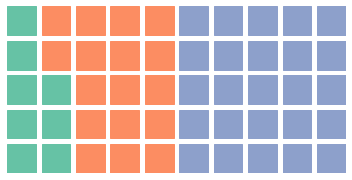

In [55]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[1, 2, 3], # 전체에서 비율을 계산하여 보여줌.
    figsize=(5, 3),
)
plt.show()

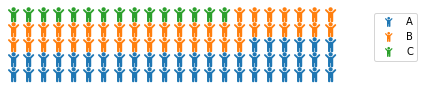

In [61]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, # row만 설정하면 자동 계산.
    values=data, 
    cmap_name='tab10',
#     colors=["#232066", "#983D3D", "#DCB732"], # 개별적으로 색상 전달
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    starting_location='SE', # NW, SW, NE and SE
    vertical=True, # 진행 방향.
    block_arranging_style= 'new-line', # 진행 방식. 기본은 'snake'
    icons='child',
    icon_legend=True,
    font_size=15
)
plt.show()

## Venn

In [62]:
from matplotlib_venn import venn2

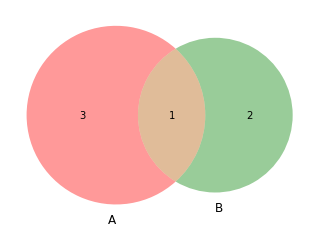

In [63]:
# 2개의 부분집합
venn2(subsets = (3, 2, 1))

In [64]:
from matplotlib_venn import venn3

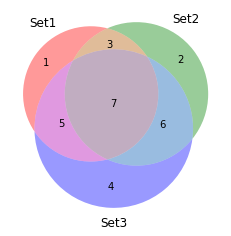

In [65]:
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('Set1', 'Set2', 'Set3'))

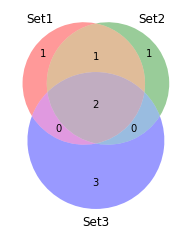

In [66]:
# 파라미터로 set을 전달
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], 
      set_labels=('Set1', 'Set2', 'Set3'))
plt.show()